<a href="https://colab.research.google.com/github/shiri9/ANN-NSL-KDD/blob/main/ANN_NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#reading training csv file from google drive
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kdd_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kdd_test.csv')

In [20]:
#getting number of rows and columns
df_train.shape

(125973, 42)

In [21]:
#getting number of rows and columns
df_test.shape

(22544, 42)

In [22]:
#checking the number of output labels in the train dataset
len(df_train.groupby('labels')['labels'].agg('count'))

df_train.groupby('labels')['labels'].agg('count')

labels
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: labels, dtype: int64

In [23]:
#checking the number of output labels in the test dataset
len(df_test.groupby('labels')['labels'].agg('count'))

df_test.groupby('labels')['labels'].agg('count')

labels
apache2              228
back                 227
buffer_overflow       17
ftp_write              2
guess_passwd         411
httptunnel            41
imap                   2
ipsweep              479
land                   2
loadmodule             4
mailbomb              94
mscan                310
multihop               9
named                  2
neptune             6654
nmap                 206
normal             11245
perl                   1
phf                    1
pod                   35
portsweep            371
processtable         211
ps                     9
rootkit                4
saint                 93
satan                698
sendmail               8
smurf                540
snmpgetattack         43
snmpguess             99
teardrop             104
warezclient          107
warezmaster          279
xlock                  4
xsnoop                 1
xterm                  3
Name: labels, dtype: int64

In [24]:
#Pre-processing
#step 1: Checking if there are any null values in the training dataset
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [25]:
#Pre-processing
#step 1: Checking if there are any null values in the test dataset
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [26]:
#creating a copy of training data frame "df"
df1_train = df_train.copy()

#checking the count of labels (output class) in the training dataset
len(df1_train.labels.unique())

23

In [27]:
#cleaning spaces before and after the output label
df1_train.labels = df1_train.labels.apply(lambda x: x.strip())
df1_train.shape

(125973, 42)

In [28]:
#creating a copy of test data frame "df"
df1_test = df_test.copy()

#checking the count of labels (output class) in the training dataset
len(df1_test.labels.unique())

36

In [29]:
#cleaning spaces before and after the output label
df1_test.labels = df1_test.labels.apply(lambda x: x.strip())
df1_test.shape

(22544, 42)

In [30]:
#Encoding categories in 0-Normal, 1-DoS, 2-Probe, 3-R2L, 4-U2R
df1_train_labels = df1_train['labels']
df1_train_labels_in_numbers = df1_train_labels.replace({ 'normal' : 0, 'neptune' : 1,'land' : 1, 'back': 1, 'teardrop': 1, 'pod': 1, 'smurf' : 1,
                                                     'ipsweep' : 2, 'nmap' : 2, 'portsweep' : 2, 'satan' : 2,
                                                     'phf': 3, 'multihop': 3, 'warezclient': 3,'warezmaster': 3, 'spy': 3, 'ftp_write' : 3,
                                                     'guess_passwd': 3,'imap': 3,
                                                     'buffer_overflow': 4, 'loadmodule': 4,'perl': 4,  'rootkit': 4 })
#replacing the string output clsses by numbers
df1_train['labels'] = df1_train_labels_in_numbers

In [31]:
#Encoding categories in 0-Normal, 1-DoS, 2-Probe, 3-R2L, 4-U2R
df1_test_labels = df1_test['labels']
df1_test_labels_in_numbers = df1_test_labels.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1,
                                                      'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1,
                                                     'ipsweep' : 2, 'nmap' : 2, 'portsweep' : 2, 'satan' : 2, 'mscan' : 2,'saint' : 2,
                                                     'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3, 'warezclient': 3,
                                                       'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,
                                                       'xsnoop': 3,'httptunnel': 3,
                                                     'buffer_overflow': 4, 'loadmodule': 4,'perl': 4,  'rootkit': 4, 'ps': 4,'xterm': 4 })
#replacing the string output clsses by numbers
df1_test['labels'] = df1_test_labels_in_numbers


In [32]:
df1_train.groupby('protocol_type')['protocol_type'].agg('count')

protocol_type
icmp      8291
tcp     102689
udp      14993
Name: protocol_type, dtype: int64

In [33]:
df1_test.groupby('protocol_type')['protocol_type'].agg('count')

protocol_type
icmp     1335
tcp     18508
udp      2701
Name: protocol_type, dtype: int64

In [34]:
df1_train.groupby('service')['service'].agg('count')

service
IRC          187
X11           73
Z39_50       862
aol            2
auth         955
            ... 
urp_i        602
uucp         780
uucp_path    689
vmnet        617
whois        693
Name: service, Length: 70, dtype: int64

In [35]:
df1_test.groupby('service')['service'].agg('count')

service
IRC           22
X11           13
Z39_50       120
aol            1
auth         140
            ... 
urp_i         75
uucp         119
uucp_path    123
vmnet         97
whois        104
Name: service, Length: 66, dtype: int64

In [36]:
df1_train.groupby('flag')['flag'].agg('count')

flag
OTH          46
REJ       11233
RSTO       1562
RSTOS0      103
RSTR       2421
S0        34851
S1          365
S2          127
S3           49
SF        74945
SH          271
Name: flag, dtype: int64

In [37]:
df1_test.groupby('flag')['flag'].agg('count')

flag
OTH           4
REJ        2596
RSTO        447
RSTOS0       12
RSTR        489
S0         4993
S1           46
S2           20
S3           79
SF        13803
SH           55
Name: flag, dtype: int64

In [38]:
#Transform categorical features into numbers using LabelEncoder() from train dataset
df1_train = df1_train.apply(LabelEncoder().fit_transform)
dftrain = df1_train

#Transform categorical features into numbers using LabelEncoder() from test dataset
df1_test = df1_test.apply(LabelEncoder().fit_transform)
dftest = df1_test

In [39]:
#checking columns with no values other than ZERO
zero_columns_train_set = df1_train.columns[(df1_train == 0).all()]
zero_columns_train_set

Index(['num_outbound_cmds'], dtype='object')

In [40]:
#checking columns with no values other than ZERO
zero_columns_test_set = df1_train.columns[(df1_train == 0).all()]
zero_columns_test_set

Index(['num_outbound_cmds'], dtype='object')

In [41]:
# Dropping the column "num_outbound_cmds" from train and test datasets
df1_train = df1_train.drop('num_outbound_cmds', axis=1)
df1_test = df1_test.drop('num_outbound_cmds', axis=1)

In [42]:
#checking standard deviation in train dataset
standard_deviation_train = df1_train.std()
print(standard_deviation_train)

duration                        268.914319
protocol_type                     0.426620
service                          16.346470
flag                              2.689365
src_bytes                       596.576429
dst_bytes                      1838.795514
land                              0.014086
wrong_fragment                    0.171638
urgent                            0.014366
hot                               1.779471
num_failed_logins                 0.045239
logged_in                         0.489010
num_compromised                   1.381835
root_shell                        0.036603
su_attempted                      0.045154
num_root                          1.271473
num_file_creations                0.450387
num_shells                        0.022181
num_access_files                  0.099370
is_host_login                     0.002817
is_guest_login                    0.096612
count                           114.508607
srv_count                        72.440598
serror_rate

In [43]:
#checking standard deviation in test dataset
standard_deviation_test = df1_test.std()
print(standard_deviation_test)

duration                        73.241592
protocol_type                    0.418765
service                         15.093625
flag                             2.865630
src_bytes                      336.307726
dst_bytes                      910.095804
land                             0.009419
wrong_fragment                   0.148155
urgent                           0.016313
hot                              1.034537
num_failed_logins                0.104942
logged_in                        0.491114
num_compromised                  0.612202
root_shell                       0.045126
su_attempted                     0.045160
num_root                         0.593210
num_file_creations               0.206240
num_shells                       0.031232
num_access_files                 0.085980
is_host_login                    0.006660
is_guest_login                   0.119922
count                          115.894433
srv_count                       69.991317
serror_rate                     34

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized (assuming they are numerical features)
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
                     'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate',
                     'srv_rerror_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate',
                     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','hot','num_compromised','num_root',]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the selected columns
scaler.fit(df1_train[numerical_columns])

# Transform the selected columns with the scaler
df1_train[numerical_columns] = scaler.transform(df1_train[numerical_columns])

In [45]:
#checking standard deviation in train dataset
standard_deviation_train = df1_train.std()
print(standard_deviation_train)

duration                        0.090240
protocol_type                   0.426620
service                        16.346470
flag                            2.689365
src_bytes                       0.178616
dst_bytes                       0.197190
land                            0.014086
wrong_fragment                  0.171638
urgent                          0.014366
hot                             0.065906
num_failed_logins               0.045239
logged_in                       0.489010
num_compromised                 0.015883
root_shell                      0.036603
su_attempted                    0.045154
num_root                        0.015697
num_file_creations              0.450387
num_shells                      0.022181
num_access_files                0.099370
is_host_login                   0.002817
is_guest_login                  0.096612
count                           0.224087
srv_count                       0.142600
serror_rate                     0.446160
srv_serror_rate 

In [46]:
# Select the columns to be normalized (assuming they are numerical features)
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
                     'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate',
                     'srv_rerror_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate',
                     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','hot','num_compromised','num_root',]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the selected columns
scaler.fit(df1_test[numerical_columns])

# Transform the selected columns with the scaler
df1_test[numerical_columns] = scaler.transform(df1_test[numerical_columns])

In [47]:
#checking standard deviation in test dataset
standard_deviation_test = df1_test.std()
print(standard_deviation_test)

duration                        0.104184
protocol_type                   0.418765
service                        15.093625
flag                            2.865630
src_bytes                       0.221839
dst_bytes                       0.243081
land                            0.009419
wrong_fragment                  0.148155
urgent                          0.016313
hot                             0.060855
num_failed_logins               0.104942
logged_in                       0.491114
num_compromised                 0.021864
root_shell                      0.045126
su_attempted                    0.045160
num_root                        0.022816
num_file_creations              0.206240
num_shells                      0.031232
num_access_files                0.085980
is_host_login                   0.006660
is_guest_login                  0.119922
count                           0.243988
srv_count                       0.163914
serror_rate                     0.415511
srv_serror_rate 

In [48]:
df1_train_with_correlation = df1_train.copy()

# Calculate the correlation matrix
corr_matrix = df1_train_with_correlation.corr().abs()

# Set the correlation threshold
correlation_threshold = 0.7

# Create a set to store the correlated feature names
correlated_features = set()

# Iterate through the correlation matrix and find highly correlated feature pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= correlation_threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            correlated_features.add(feature_i)
            correlated_features.add(feature_j)

# Remove the highly correlated features from the dataset
df1_train_with_correlation.drop(correlated_features, axis=1, inplace=True)


In [49]:
df1_train_with_correlation.shape

(125973, 24)

In [53]:
# Get the list of column names
feature_names = df1_train_with_correlation.columns.tolist()

# Print the list of feature names
print("List of Features:")
for feature in feature_names:
    print(feature)

List of Features:
duration
protocol_type
service
src_bytes
dst_bytes
land
wrong_fragment
urgent
num_failed_logins
logged_in
root_shell
num_file_creations
num_shells
num_access_files
is_host_login
count
srv_count
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
labels


In [54]:
# Get the set of features for each dataset
features_set1 = set(df1_train.columns)
features_set2 = set(df1_train_with_correlation.columns)

# Find the features present in df1_train but absent in df1_train_with_correlation
features_only_in_df1_train = features_set1 - features_set2

# Find the features present in df1_train_with_correlation but absent in df1_train
features_only_in_df1_train_with_correlation = features_set2 - features_set1

# Print the features present only in df1_train
print("Features present only in df1_train:")
for feature in features_only_in_df1_train:
    print(feature)

# Print the features present only in df1_train_with_correlation
print("Features present only in df1_train_with_correlation:")
for feature in features_only_in_df1_train_with_correlation:
    print(feature)

Features present only in df1_train:
same_srv_rate
num_compromised
hot
dst_host_rerror_rate
dst_host_srv_rerror_rate
srv_serror_rate
rerror_rate
dst_host_srv_count
flag
num_root
is_guest_login
dst_host_same_srv_rate
serror_rate
dst_host_serror_rate
dst_host_srv_serror_rate
su_attempted
srv_rerror_rate
Features present only in df1_train_with_correlation:


In [57]:
df1_test_with_correlation_copy = df1_test.copy()

#drop the same correlated features from test set that were dropped from the train set
df1_test_with_correlation = df1_test_with_correlation_copy.drop(features_only_in_df1_train, axis=1)

# Get the set of features for each dataset
features_set1 = set(df1_test.columns)
features_set2 = set(df1_test_with_correlation.columns)

# Find the features present in df1_train but absent in df1_train_with_correlation
features_only_in_df1_test = features_set1 - features_set2

# Find the features present in df1_train_with_correlation but absent in df1_train
features_only_in_df1_test_with_correlation = features_set2 - features_set1

# Print the features present only in df1_train
print("Features present only in df1_test:")
for feature in features_only_in_df1_test:
    print(feature)

# Print the features present only in df1_train_with_correlation
print("Features present only in df1_test_with_correlation:")
for feature in features_only_in_df1_test_with_correlation:
    print(feature)

Features present only in df1_test:
same_srv_rate
num_compromised
hot
dst_host_rerror_rate
dst_host_srv_rerror_rate
srv_serror_rate
rerror_rate
dst_host_srv_count
flag
num_root
is_guest_login
dst_host_same_srv_rate
serror_rate
dst_host_serror_rate
dst_host_srv_serror_rate
su_attempted
srv_rerror_rate
Features present only in df1_test_with_correlation:


In [58]:
df1_test_with_correlation.shape

(22544, 24)

In [59]:
df1_train_with_correlation.shape

(125973, 24)

Accuracy: 0.9096433640880057
Precision: 0.8324173074916527
Recall: 0.6330118348836205
Learning Time: 1.540470838546753 seconds
Detection Time: 0.008858442306518555 seconds
Mean Squared Error: 0.4878459900638751
Confusion Matrix:
[[11152    13    76     4     0]
 [  400  7526   144    21     4]
 [  388    66  1703     0     0]
 [  889     0     3   113     4]
 [   22     0     0     3    13]]
Confusion matrix saved as confusion_matrix.png


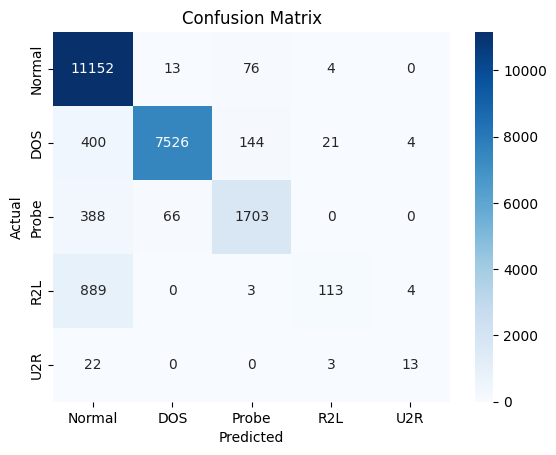

In [65]:
#implementing decision tree model on datasets without correlation drop

import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Separate the features and target variable
X_train = df1_train.drop('labels', axis=1)  # Features
y_train = df1_train['labels']  # Target variable

# Separate the features and target variable
X_test = df1_test.drop('labels', axis=1)  # Features
y_test = df1_test['labels']  # Target variable


start_time = time.time()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

learning_time = time.time() - start_time



start_time = time.time()

# Make predictions on the test set
y_pred = clf.predict(X_test)

detection_time = time.time() - start_time


# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Learning Time:", learning_time, "seconds")
print("Detection Time:", detection_time, "seconds")

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Define the labels for the confusion matrix
labels = ['Normal', 'DOS', 'Probe', 'R2L','U2R']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the plot as an image file
plt.savefig('confusion_matrix.png', dpi=300)

# Display a message indicating the file has been saved
print("Confusion matrix saved as confusion_matrix.png")

# Display the plot
plt.show()

Accuracy: 0.9025017743080199
Precision: 0.8726361422590934
Recall: 0.6236150730038283
Learning Time: 1.6076500415802002 seconds
Detection Time: 0.007466316223144531 seconds
Mean Squared Error: 0.4878459900638751
Confusion Matrix:
[[11079    48   106    11     1]
 [  629  7401    47    18     0]
 [  305    75  1772     5     0]
 [  907     1    19    82     0]
 [   23     0     0     3    12]]
Confusion matrix saved as confusion_matrix.png


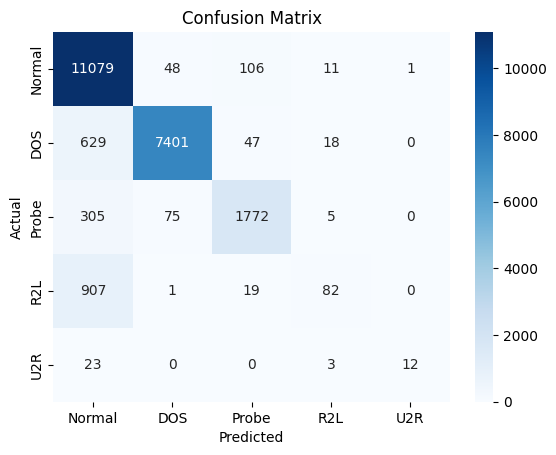

In [66]:
#implementing decision tree model on datasets with correlation drop

import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Separate the features and target variable
X_train_with_correlation = df1_train_with_correlation.drop('labels', axis=1)  # Features
y_train_with_correlation = df1_train_with_correlation['labels']  # Target variable

# Separate the features and target variable
X_test_with_correlation = df1_test_with_correlation.drop('labels', axis=1)  # Features
y_test_with_correlation = df1_test_with_correlation['labels']  # Target variable


start_time = time.time()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train_with_correlation, y_train_with_correlation)

learning_time = time.time() - start_time



start_time = time.time()

# Make predictions on the test set
y_pred_with_correlation = clf.predict(X_test_with_correlation)

detection_time = time.time() - start_time


# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_with_correlation, y_pred_with_correlation)
precision = precision_score(y_test_with_correlation, y_pred_with_correlation, average='macro')
recall = recall_score(y_test_with_correlation, y_pred_with_correlation, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Learning Time:", learning_time, "seconds")
print("Detection Time:", detection_time, "seconds")

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compute the confusion matrix
cm = confusion_matrix(y_test_with_correlation, y_pred_with_correlation)

print("Confusion Matrix:")
print(cm)

# Define the labels for the confusion matrix
labels = ['Normal', 'DOS', 'Probe', 'R2L','U2R']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the plot as an image file
plt.savefig('confusion_matrix_with_correlation.png', dpi=300)

# Display a message indicating the file has been saved
print("Confusion matrix saved as confusion_matrix.png")

# Display the plot
plt.show()

Accuracy: 0.8946061036195884
Precision: 0.6849476444982113
Recall: 0.5822879979365496
Learning Time: 26.850566148757935 seconds
Detection Time: 0.0026044845581054688 seconds
Mean Squared Error: 0.5255500354861604
Confusion Matrix:
[[10988    46   120    88     3]
 [  412  7452   231     0     0]
 [  376   120  1661     0     0]
 [  844    26    71    60     8]
 [   27     0     0     4     7]]
Confusion matrix saved as confusion_matrix.png


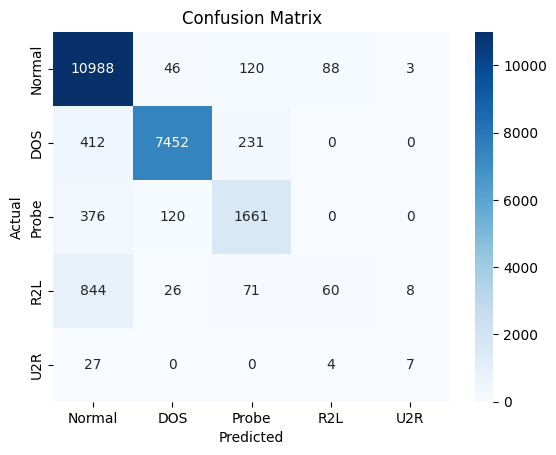

In [71]:
#implementing decision tree model on datasets with Recursive Feature Extraction

from sklearn.feature_selection import RFE

df2_train = df1_train.copy()
df2_test = df1_test.copy()

# Separate the features and target variable
X_train = df2_train.drop('labels', axis=1)  # Features
y_train = df2_train['labels']  # Target variable

# Separate the features and target variable
X_test = df2_test.drop('labels', axis=1)  # Features
y_test = df2_test['labels']  # Target variable


start_time = time.time()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=clf, n_features_to_select=10)  # Adjust the number of features as needed

rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the decision tree classifier on the selected features
clf.fit(X_train_selected, y_train)

learning_time = time.time() - start_time


start_time = time.time()

# Make predictions on the test set
y_pred_with_rfe = clf.predict(X_test_selected)

detection_time = time.time() - start_time


# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred_with_rfe)
precision = precision_score(y_test, y_pred_with_rfe, average='macro')
recall = recall_score(y_test, y_pred_with_rfe, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Learning Time:", learning_time, "seconds")
print("Detection Time:", detection_time, "seconds")

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred_with_rfe)
print("Mean Squared Error:", mse)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_with_rfe)

print("Confusion Matrix:")
print(cm)

# Define the labels for the confusion matrix
labels = ['Normal', 'DOS', 'Probe', 'R2L','U2R']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the plot as an image file
plt.savefig('confusion_matrix_with_rfe_10.png', dpi=300)

# Display a message indicating the file has been saved
print("Confusion matrix saved as confusion_matrix.png")

# Display the plot
plt.show()
